In [16]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [17]:
csv_directory = 'C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_14_Jun2018/results/N2c/20180703_I_N2c_HSVRepeat_EVOS10x/Triangle/mean_grey_GFP.tif.csv'

In [18]:
df = pd.read_csv(csv_directory)

In [19]:
li = df[0:8448]
triangle = df[8448:16896]

li_rfp = li[0:4224]
li_gfp = li[4224:8448]

triangle_rfp = triangle[0:4224]
triangle_gfp = triangle[4224:8448]

triangle_gfp_2 = triangle_gfp.reset_index(drop=True)
li_gfp_2 = li_gfp.reset_index(drop = True)

com_gfp = pd.concat((li_gfp_2, triangle_gfp_2))
by_row_gfp = com_gfp.groupby(com_gfp.index)
com_gfp_means = by_row_gfp.mean()

triangle_rfp_2 = triangle_rfp.reset_index(drop=True)
li_rfp_2 = li_rfp.reset_index(drop= True)

com_rfp = pd.concat((li_rfp_2, triangle_rfp_2))
by_row_rfp = com_rfp.groupby(com_rfp.index)
com_rfp_means = by_row_rfp.mean()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/SimonThompson/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_14_Jun2018/HSV_14Jun_Plots/Mean_Grey_Flat_Condition.png'

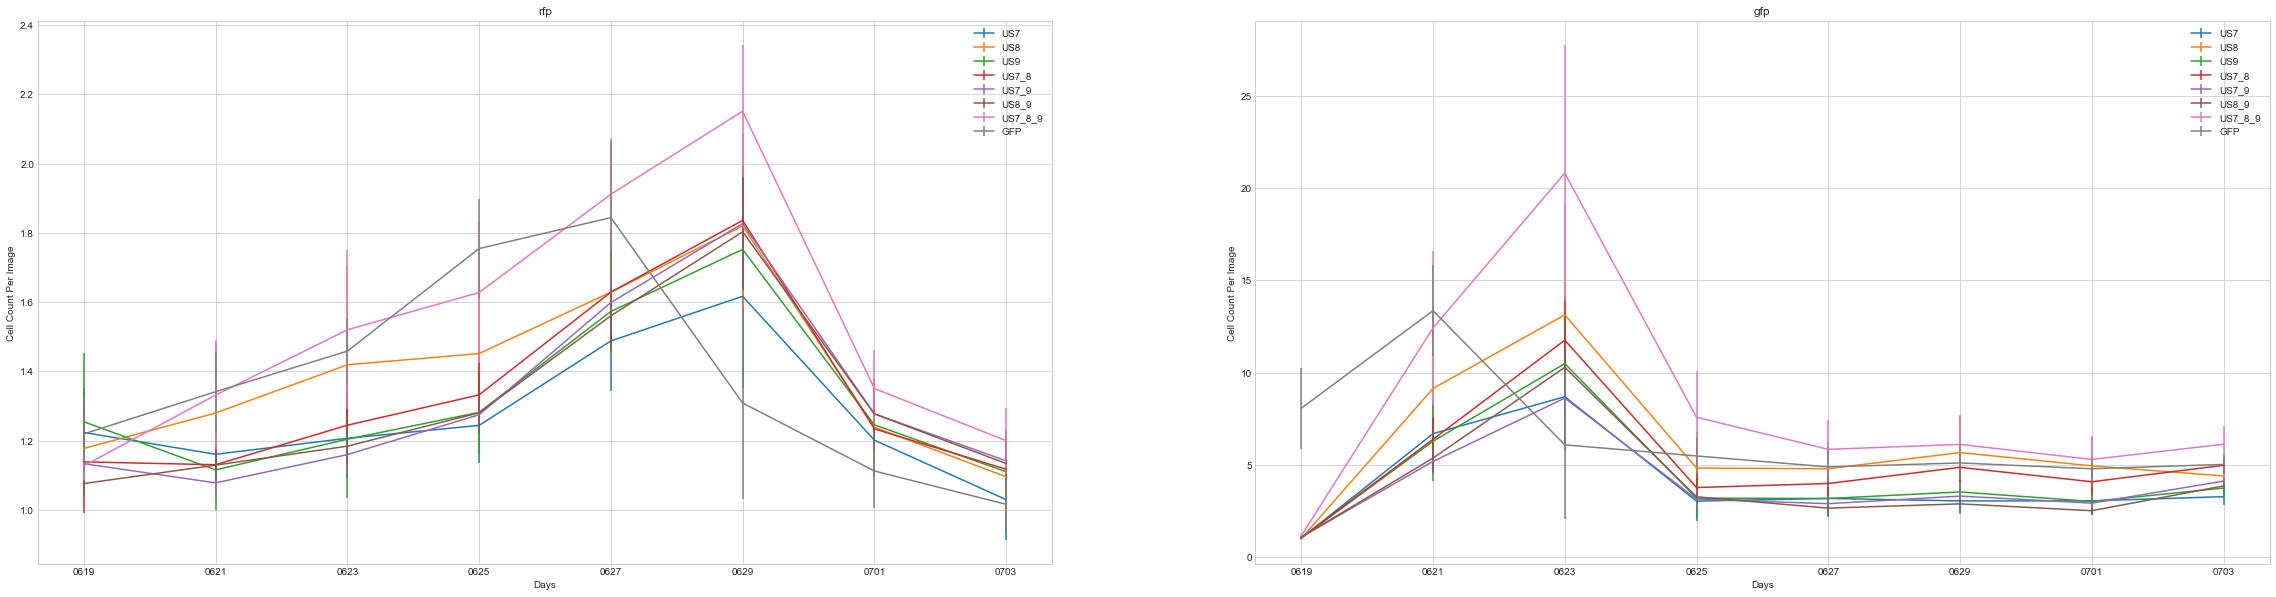

In [20]:

Day_list = ["0619", "0621", "0623", "0625", "0627", "0629", "0701", "0703"]
df_list = [li_rfp, li_gfp]
titles = ["rfp", "gfp"]
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=True, figsize = (40,10))
axes = [ax1, ax2]
legend = ["US7", "US8", "US9", "US7_8", "US7_9", "US8_9", "US7_8_9", "GFP"]

for aa in range(len(df_list)):
    day_jump = 528
    well_jump = 22

    for z in range(len(legend)):
        cond_j = 66*(z+1)
        c1 = [0]*len(Day_list)
        c1_sem = [0]*len(Day_list)

        for q in range(len(Day_list)):
            c1[q] = df_list[aa][q*day_jump:(q+1)*day_jump][cond_j-66:cond_j]["Mean"].mean()
            c1_sem[q] = df_list[aa][q*day_jump:(q+1)*day_jump][cond_j-66:cond_j]["Mean"].std()
            
        axes[aa].errorbar(Day_list, c1, yerr = c1_sem)

    axes[aa].set_xlabel("Days")
    axes[aa].set_ylabel("Cell Count Per Image")
    axes[aa].set_title(titles[aa])
    axes[aa].legend(legend)    
plt.savefig('C:/Users/SimonThompson/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_14_Jun2018/HSV_14Jun_Plots/Mean_Grey_Flat_Condition'+ '.png')

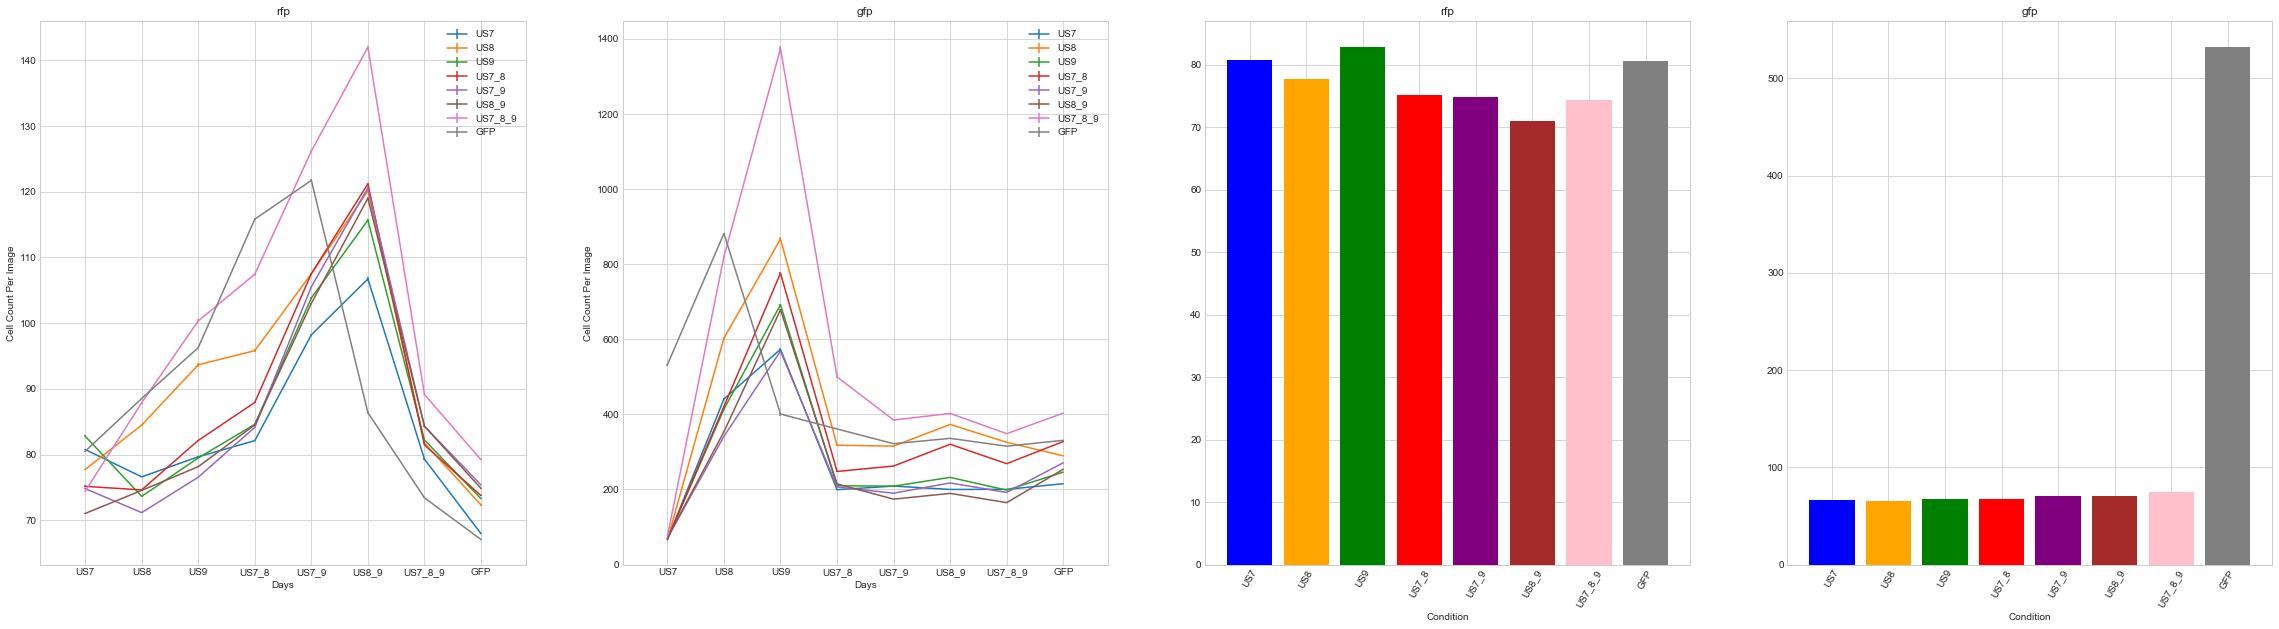

In [39]:

Day_list = ["0619", "0621", "0623", "0625", "0627", "0629", "0701", "0703"]
df_list = [li_rfp, li_gfp]
titles = ["rfp", "gfp"]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=False, sharex=True, figsize = (40,10))
axes = [ax1, ax2, ax3, ax4]
legend = ["US7", "US8", "US9", "US7_8", "US7_9", "US8_9", "US7_8_9", "GFP"]
bar = [0]*len(Day_list)

for aa in range(len(df_list)):
    day_jump = 528
    well_jump = 22

    for z in range(len(legend)):
        cond_j = 66*(z+1)
        c1 = [0]*len(Day_list)
        c1_sem = [0]*len(Day_list)

        for q in range(len(Day_list)):
            c1[q] = df_list[aa][q*day_jump:(q+1)*day_jump][cond_j-66:cond_j]["Mean"].sum()
            c1_sem[q] = df_list[aa][q*day_jump:(q+1)*day_jump][cond_j-66:cond_j]["Mean"].std()
            
            if q == 0:
                bar[z] = c1[q]
                bar_sem[z] = c1_sem[q]
            
            
        axes[aa].errorbar(Day_list, c1, yerr = c1_sem)

    axes[aa].set_xlabel("Days")
    axes[aa].set_ylabel("Cell Count Per Image")
    axes[aa].set_title(titles[aa])
    axes[aa].legend(legend)    
    
    axes[aa+2].bar(np.arange(len(legend)), bar ,  color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey'])
    axes[aa+2].set_xticks(np.arange(len(legend)))
    axes[aa+2].set_xticklabels(legend, rotation =60)
    axes[aa+2].set_title(titles[aa])
    axes[aa+2].set_xlabel("Condition")

    axes[aa].set_title(titles[aa])
    axes[aa].legend(legend)
    
plt.savefig('C:/Users/SimonThompson/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_14_Jun2018/HSV_14Jun_Plots/MeanGrey_sum'+ '.png')

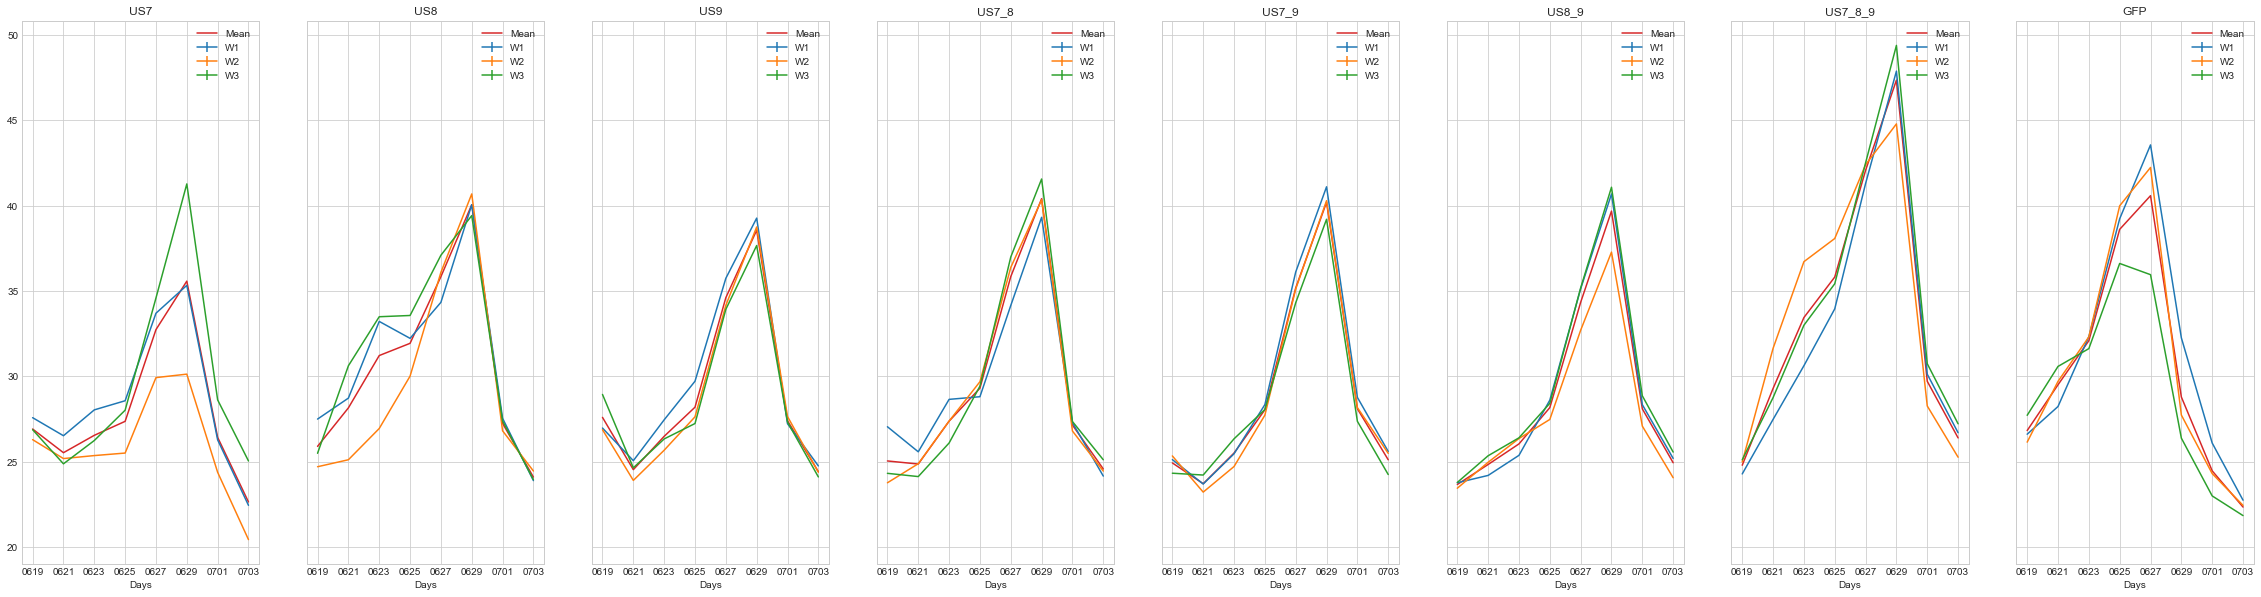

In [14]:


Day_list = ["0619", "0621", "0623", "0625", "0627", "0629", "0701", "0703"]
df_list = [li_rfp]
titles = ["com_rfp"]
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)) = plt.subplots(1, 8, sharey=True, sharex=True, figsize = (40,10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for aa in range(len(df_list)):
    day_jump = 528
    well_jump = 66

    legend = ["US7", "US8", "US9", "US7_8", "US7_9", "US8_9", "US7_8_9", "GFP"]

    for v in range(len(legend)):
        well_j = 66*(v+1)
        
        w1 = [0]*len(Day_list)
        w2 = [0]*len(Day_list)
        w3 = [0]*len(Day_list)
        w_con = [0]*len(Day_list)
        
        w1_sem = [0]*len(Day_list)
        w2_sem = [0]*len(Day_list)
        w3_sem = [0]*len(Day_list)
        w_con_sem = [0]*len(Day_list)
        
        for q in range(len(Day_list)): 
            w1[q] = df_list[aa][q*day_jump:(q+1)*day_jump][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Mean"].sum()
            w2[q] = df_list[aa][q*day_jump:(q+1)*day_jump][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Mean"].sum()
            w3[q] = df_list[aa][q*day_jump:(q+1)*day_jump][int(well_j-(well_jump/3)):well_j]["Mean"].sum()
            
            w_con[q] = np.mean([w1[q], w2[q], w3[q]])

        
    
        axes[v + (aa*8)].errorbar(Day_list, w1, label = 'W1', yerr = w1_sem)
        axes[v + (aa*8)].errorbar(Day_list, w2, label = 'W2', yerr = w2_sem)
        axes[v + (aa*8)].errorbar(Day_list, w3, label = 'W3', yerr = w3_sem)
        axes[v + (aa*8)].plot(Day_list, w_con, label = 'Mean')
        axes[v + (aa*8)].legend()
        axes[v + (aa*8)].set_xlabel("Days")
        axes[v + (aa*8)].set_title(legend[v])
    
#plt.savefig('C:/Users/SimonThompson/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_14_Jun2018/HSV_14Jun_Plots/Meangrey_wellcomparison_rfp'+ '.png')

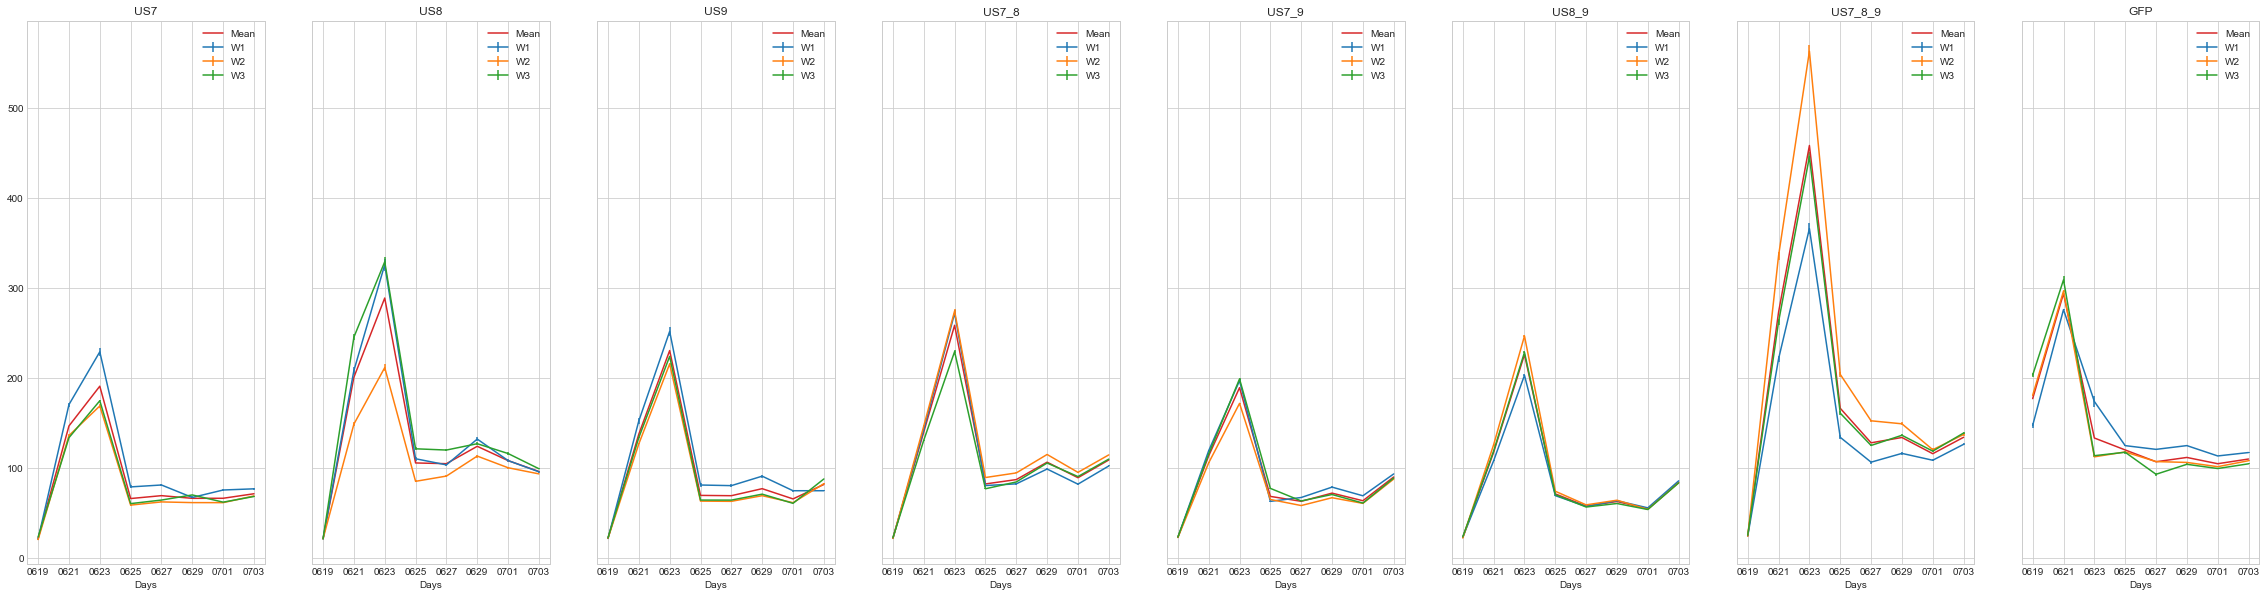

In [20]:


Day_list = ["0619", "0621", "0623", "0625", "0627", "0629", "0701", "0703"]
df_list = [li_gfp]
titles = ["GFP"]
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)) = plt.subplots(1, 8, sharey=True, sharex=True, figsize = (40,10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for aa in range(len(df_list)):
    day_jump = 528
    well_jump = 66

    legend = ["US7", "US8", "US9", "US7_8", "US7_9", "US8_9", "US7_8_9", "GFP"]

    for v in range(len(legend)):
        well_j = 66*(v+1)
        
        w1 = [0]*len(Day_list)
        w2 = [0]*len(Day_list)
        w3 = [0]*len(Day_list)
        w_con = [0]*len(Day_list)
        
        w1_sem = [0]*len(Day_list)
        w2_sem = [0]*len(Day_list)
        w3_sem = [0]*len(Day_list)
        w_con_sem = [0]*len(Day_list)
        
        for q in range(len(Day_list)): 
            w1[q] = df_list[aa][q*day_jump:(q+1)*day_jump][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Mean"].sum()
            w2[q] = df_list[aa][q*day_jump:(q+1)*day_jump][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Mean"].sum()
            w3[q] = df_list[aa][q*day_jump:(q+1)*day_jump][int(well_j-(well_jump/3)):well_j]["Mean"].sum()
        
            w_con[q] = np.mean([w1[q], w2[q], w3[q]])
         
            w1_sem[q] = df_list[aa][q*day_jump:(q+1)*day_jump][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Mean"].std()
            w2_sem[q] = df_list[aa][q*day_jump:(q+1)*day_jump][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Mean"].std()
            w3_sem[q] = df_list[aa][q*day_jump:(q+1)*day_jump][int(well_j-(well_jump/3)):well_j]["Mean"].std()

        
        axes[v + (aa*8)].errorbar(Day_list, w1, label = 'W1', yerr = w1_sem)
        axes[v + (aa*8)].errorbar(Day_list, w2, label = 'W2', yerr = w2_sem)
        axes[v + (aa*8)].errorbar(Day_list, w3, label = 'W3', yerr = w3_sem)
        axes[v + (aa*8)].plot(Day_list, w_con, label = 'Mean')
        axes[v + (aa*8)].legend()
        axes[v + (aa*8)].set_xlabel("Days")
        axes[v + (aa*8)].set_title(legend[v])
    
plt.savefig('C:/Users/SimonThompson/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_14_Jun2018/HSV_14Jun_Plots/Meangrey_wellcomparison_gfp'+ '.png')

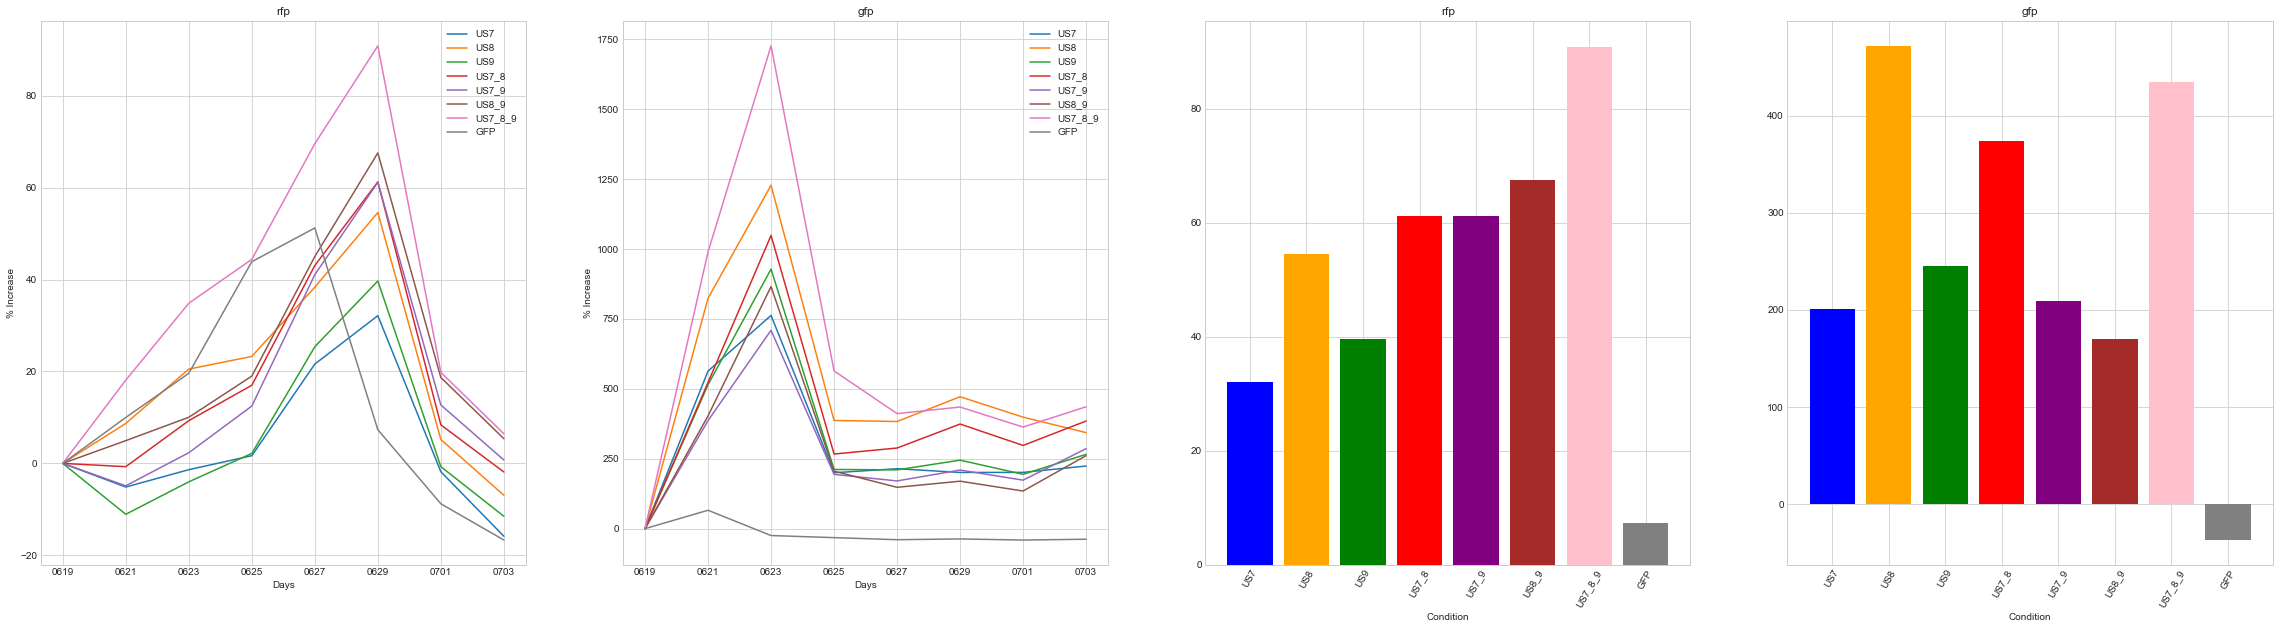

In [30]:
#6 Combined Means (Li + Triangle),whole condition, percentage Increase

Day_list = ["0619", "0621", "0623", "0625", "0627", "0629", "0701", "0703"]
df_list = [li_rfp, li_gfp]
titles = ["rfp", "gfp"]
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=False,  figsize = (40,10))
axes = [ax1, ax2, ax3, ax4]
legend = ["US7", "US8", "US9", "US7_8", "US7_9", "US8_9", "US7_8_9", "GFP"]

for aa in range(len(df_list)):
    day_jump = 528
    well_jump = 22   
    bar = [0]*len(legend)
    bar_sem = [0]*len(legend)
    
    for z in range(len(legend)):
        cond_j = 66*(z+1)
        c1 = [0]*len(Day_list)
        perc_c1 = [0]*len(Day_list)
        c1_sem = [0]*len(Day_list)

        for q in range(len(Day_list)):
            c1[q] = df_list[aa][q*day_jump:(q+1)*day_jump][cond_j-66:cond_j]["Mean"].mean()
            perc_c1[q] = ((c1[q]-c1[0])/c1[0])*100
            c1_sem[q] = df_list[aa][q*day_jump:(q+1)*day_jump][cond_j-66:cond_j]["Mean"].sem()
            
            if q == 5:
                bar[z] = perc_c1[q]
                bar_sem[z] = c1_sem[q]

        axes[aa].errorbar(Day_list, perc_c1)
        axes[aa].set_xlabel("Days")
        axes[aa].set_ylabel("% Increase")
        
    axes[aa+2].bar(np.arange(len(legend)), bar ,  color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'grey'])
    axes[aa+2].set_xticks(np.arange(len(legend)))
    axes[aa+2].set_xticklabels(legend, rotation =60)
    axes[aa+2].set_title(titles[aa])
    axes[aa+2].set_xlabel("Condition")

    axes[aa].set_title(titles[aa])
    axes[aa].legend(legend)
    
plt.savefig('C:/Users/SimonThompson/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_14_Jun2018/HSV_14Jun_Plots/Meangrey_perc_inc'+ '.png')

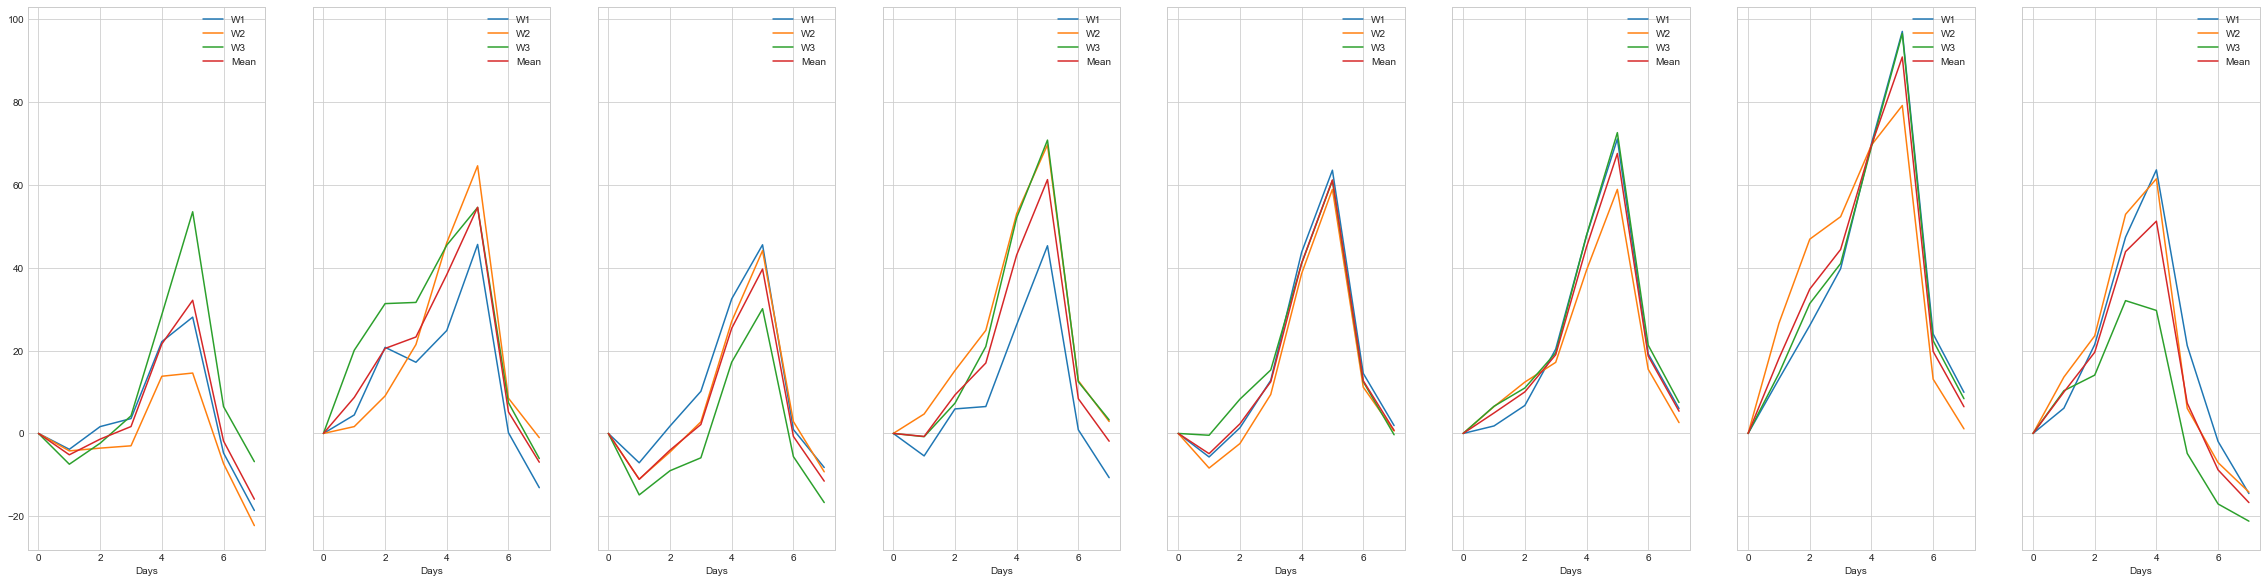

In [12]:
#8 Combined (Li + Triangle), well means, well comparison, percentage increase
Day_list = ["0619", "0621", "0623", "0625", "0627", "0629", "0701", "0703"]
df_list = [li_rfp]
titles = [""]
legend = ["US7", "US8", "US9", "US7_8", "US7_9", "US8_9", "US7_8_9", "GFP"]

fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8)) = plt.subplots(1, 8, sharey=True, sharex=True, figsize = (40,10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16]
for aa in range(len(df_list)):
    day_jump = 528
    well_jump = 66

    for v in range(len(legend)):
        well_j = 66*(v+1)
        
        w1 = [0]*len(Day_list)
        w2 = [0]*len(Day_list)
        w3 = [0]*len(Day_list)
        w_con = [0]*len(Day_list)
        
        perc_w1 = [0]*len(Day_list)
        perc_w2 = [0]*len(Day_list)
        perc_w3 = [0]*len(Day_list)
        perc_w_con = [0]*len(Day_list)
        
        w1_std = [0]*len(Day_list)
        w2_std = [0]*len(Day_list)
        w3_std = [0]*len(Day_list)
        w_con_std = [0]*len(Day_list)
        
        for q in range(len(Day_list)): 
            w1[q] = df_list[aa][q*day_jump:(q+1)*day_jump][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Mean"].mean()
            w2[q] = df_list[aa][q*day_jump:(q+1)*day_jump][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Mean"].mean()
            w3[q] = df_list[aa][q*day_jump:(q+1)*day_jump][int(well_j-(well_jump/3)):well_j]["Mean"].mean()
            w_m = np.mean([w1[q], w2[q], w3[q]])
            w_con[q] = w_m
            
            perc_w1[q] = ((w1[q]-w1[0])/w1[0])*100
            perc_w2[q] = ((w2[q]-w2[0])/w2[0])*100
            perc_w3[q] = ((w3[q]-w3[0])/w3[0])*100
            perc_w_con[q] = ((w_con[q]-w_con[0])/w_con[0])*100
                   
            w1_std[q] = df_list[aa][q*day_jump:(q+1)*day_jump][well_j-well_jump:well_j-int(((well_jump/3)*2))]["Mean"].std()
            w2_std[q] = df_list[aa][q*day_jump:(q+1)*day_jump][int(well_j-(well_jump/3)*2):int(well_j-(well_jump/3))]["Mean"].std()
            w3_std[q] = df_list[aa][q*day_jump:(q+1)*day_jump][int(well_j-(well_jump/3)):well_j]["Mean"].std()

        axes[v + (aa*8)].plot(perc_w1, label = 'W1')
        axes[v + (aa*8)].plot(perc_w2, label = 'W2')
        axes[v + (aa*8)].plot(perc_w3, label = 'W3')
        axes[v + (aa*8)].plot(perc_w_con, label = 'Mean')
        axes[v + (aa*8)].legend()
        axes[v + (aa*8)].set_xlabel("Days")
    
#plt.savefig('C:/Users/SWC/Dropbox (UCL - SWC)/Data Files/Simon/Data/HSV Rabies/HSV_HEK_Transfection_14_Jun2018/HSV_14Jun_Plots/Meangrey_wellcomparison_percinc'+ '.png')
   